In [ ]:
# Step 1: Busines Understanding
# Problem Statement: Prediction of Yahoo Stock Market
# Data Set: Yahoo Stock Price
# The problem we are facing is what will be the value of Yahoo's 
# assets in the near future? At this stage some additional questions 
# also need to be reviewed to get a better and more useful data set. 
# For example, what are the factors that can be overlooked in asset 
# prices? Isn't the price dependent on the depreciation of competing companies? 
# Do foreign policies affect asset value? Is inflation not the reason for the 
# rise in asset prices? Etc etc

# Step 2: Data Exploration
# Import Libraries


import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [29]:
SPY_data = pd.read_csv('SPY_2015.csv')

# Change the Date column from object to datetime object 
SPY_data["Data"] = pd.to_datetime(SPY_data['Date'])
columns_to_drop = ['Data']  # Replace with the actual column names you want to drop
SPY_data = SPY_data.drop(columns=columns_to_drop)
# Preview the data
SPY_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/7/2015,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,12/4/2015,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,12/3/2015,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,12/2/2015,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,12/1/2015,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,11/30/2015,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,11/27/2015,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,11/25/2015,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,11/24/2015,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,11/23/2015,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


In [30]:
# Set Date as index
SPY_data.set_index('Date', inplace=True)
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date', ascending=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1/10/2011,1270.839966,1271.520020,1262.180054,1269.750000,1269.750000,4036450000
1/10/2012,1280.770020,1296.459961,1280.770020,1292.079956,1292.079956,4221960000
1/10/2013,1461.020020,1472.300049,1461.020020,1472.119995,1472.119995,4081840000
1/10/2014,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3335710000
1/11/2010,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000
...,...,...,...,...,...,...
9/9/2010,1101.150024,1110.270020,1101.150024,1104.180054,1104.180054,3387770000
9/9/2011,1185.369995,1185.369995,1148.369995,1154.229980,1154.229980,4586370000
9/9/2013,1656.849976,1672.400024,1656.849976,1671.709961,1671.709961,3102780000


In [31]:
# Check null Values
variables = SPY_data.columns
SPY_data.isnull().sum().loc[variables]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(10,8))
#     fig = plt.figure(figsize=(15,11))
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df['Adj Close'],asset, c=next(colors))
        ax.set_xlabel('Adj Close')
        ax.set_ylabel('{}'.format(var))
        ax.set_title(var +' vs price')
    fig.tight_layout()
    plt.show()

/tmp/ipykernel_12846/2771021158.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df['Adj Close'],asset, c=next(colors))


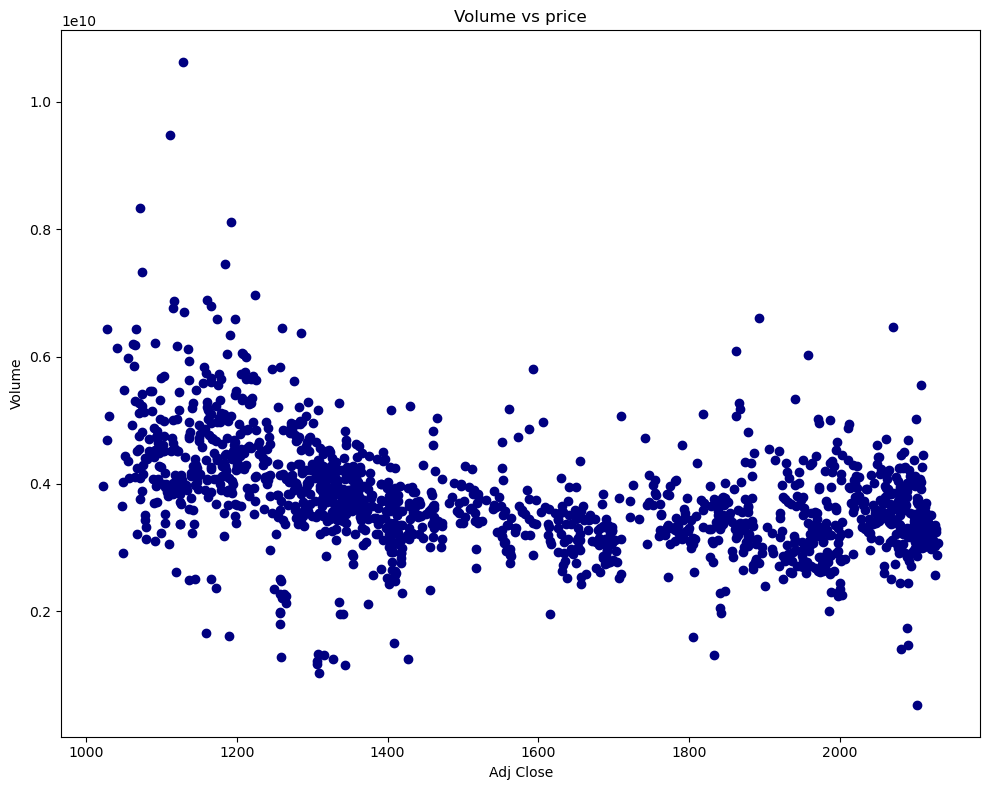

In [33]:
# Correlation
# Is there any correlation between Volume and Adj Close price?
variables = SPY_data.columns[-1:]
correlation(SPY_data,variables,1,1)

/tmp/ipykernel_12846/2771021158.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df['Adj Close'],asset, c=next(colors))


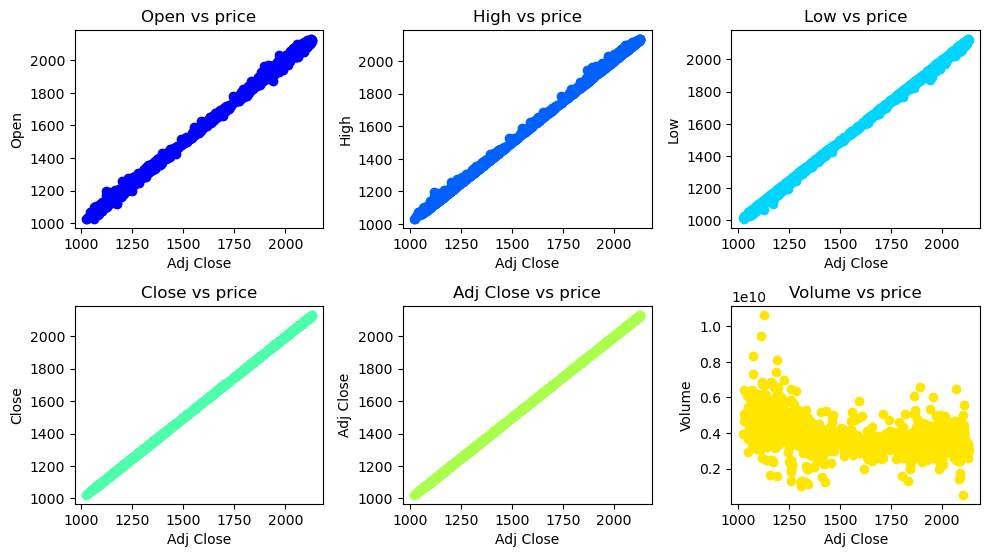

In [34]:
# Is there any correlation between Adj Close price vs.Open, High,Low,Close ?
variables = SPY_data.columns
correlation(SPY_data,variables,3,3)


In [35]:
SPY_data.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

In [36]:
# Step 5: Featuer Engineering

SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

/tmp/ipykernel_12846/2771021158.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df['Adj Close'],asset, c=next(colors))


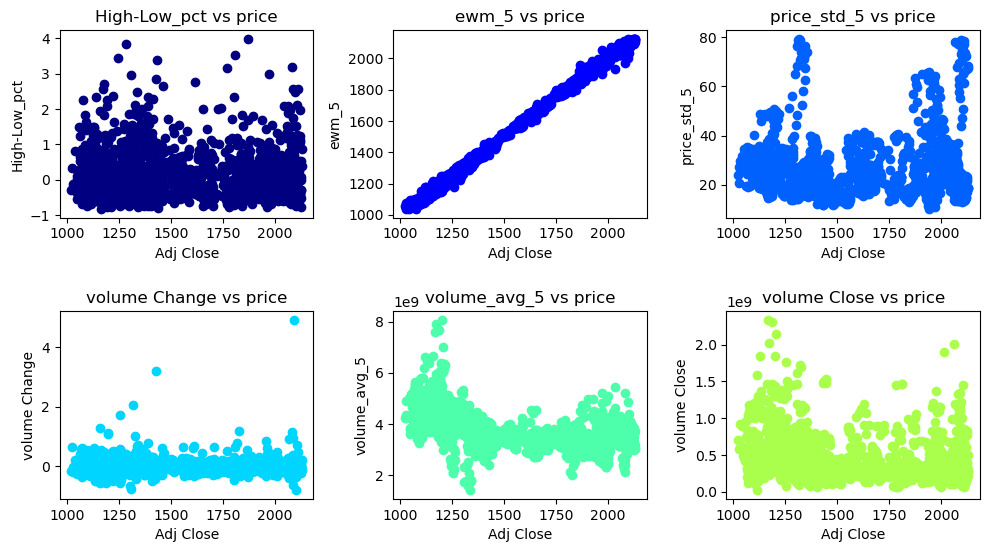

In [37]:
# Correlation with New features

jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

# Take the name of the last 6 columns of the SPY_data which are the model features

variables = SPY_data.columns[-6:]

correlation(SPY_data, variables,3,3)

In [38]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

In [39]:
# Step 6: Build Predictive Model
# Check Null Values

SPY_data.head(10)

,Open,High,Low,Close,Adj Close,Volume,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
12/7/2015,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000,NaN,NaN,NaN,NaN,NaN,NaN
12/4/2015,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000,0.802043,2077.070068,NaN,0.042309,NaN,NaN
12/3/2015,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000,0.001172,2085.841992,NaN,0.021728,NaN,NaN
12/2/2015,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
12/1/2015,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN
11/30/2015,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000,-0.344421,2084.486090,NaN,0.143559,4.045596e+09,2.328943e+08
11/27/2015,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000,-0.316414,2082.996599,NaN,-0.654457,4.085838e+09,2.493154e+08
11/25/2015,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000,-0.268577,2085.515175,NaN,0.944957,3.536224e+09,1.181180e+09
11/24/2015,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000,2.556754,2086.678895,NaN,0.361729,3.245514e+09,1.121578e+09


In [40]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
volume Change     1
volume_avg_5      5
volume Close      5
dtype: int64

In [41]:
# Drop/Remove NA records
# To Train a model,it is necessary to drop missing values.

SPY_data = SPY_data.dropna(axis = 0)


In [46]:
# Train & Test DataSet Distribution
# Genrate the train and test sets
SPY_data.index = pd.to_datetime(SPY_data.index)

# Filter the DataFrame based on dates
train = SPY_data.loc[SPY_data.index < pd.to_datetime('2015-01-01')]
test = SPY_data.loc[SPY_data.index >= pd.to_datetime('2015-01-01')]

# Rest of your code
dates = test.index

In [50]:
# Building Regression Model
lr = LinearRegression()
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]

Y_train = train['Adj Close']
lr.fit(X_train, Y_train)

LinearRegression()

In [51]:
# Test Dataset
# Create the test features dataset (X_test) which will be used to make the predictions.
X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values

# The labels of the model
Y_test = test['Adj Close'].values  # will be used for comparison

In [52]:
# Prediction

close_predictions = lr.predict(X_test)

/home/sami/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
# Model Evaluation
# Mean Absolute Error (MAE):

# In statistics, mean absolute error (MAE) is a measure of errors between paired observations 
# expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus 
# observed, subsequent time versus initial time, and one technique of measurement versus an alternative 
# technique of measurement. MAE is calculated as: ../input/data-science-project-lifecycle/mae_eq.PNG The mean 
# absolute error is a common measure of forecast error in time series analysis.

mae = sum(abs(close_predictions - test['Adj Close'].values))/ test.shape[0]
print(mae)


18.090377653292357


/tmp/ipykernel_12846/2476856080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


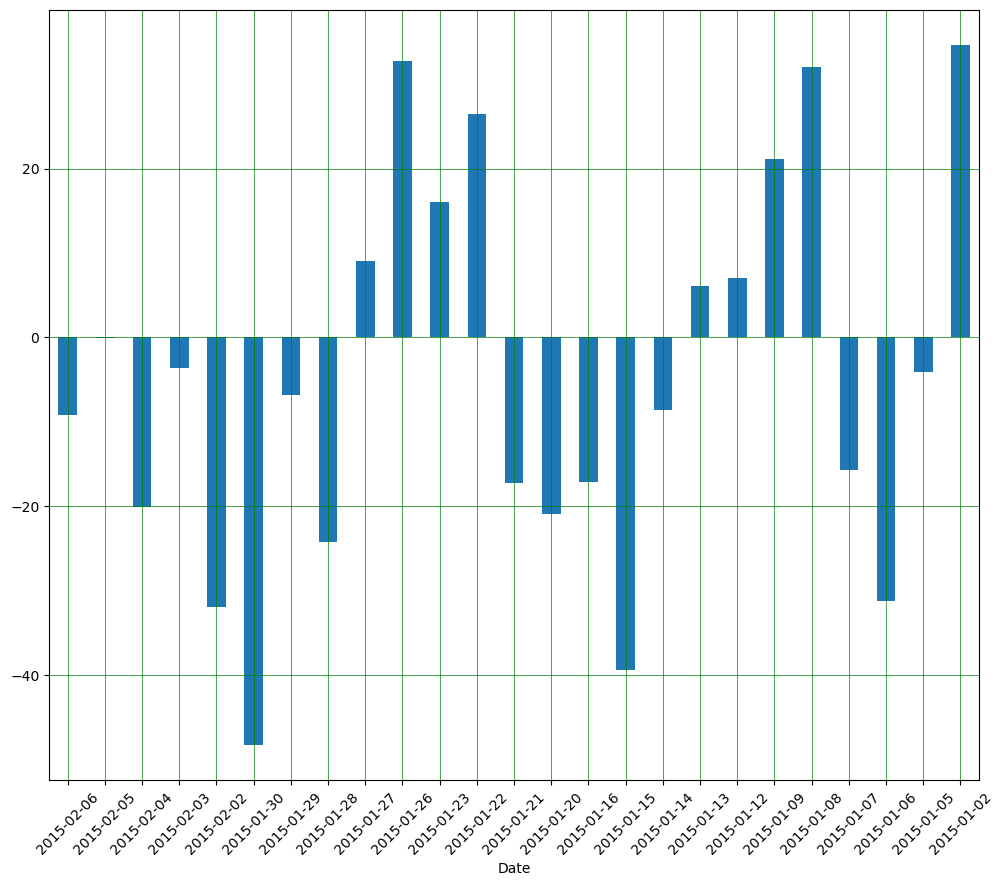

In [56]:
# The MAE value is approx. 18
# Error Graph for last 25 days
# Simple error (Actual - Predicted) computered and ploted for last 25 days.

# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual':Y_test,'Predicted': close_predictions})
df1 = df.tail(25)

# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df1.set_index('Date', inplace = True)

error = df1['Actual'] - df1['Predicted']

# Plot the error term between the actual and Predicted values for the last 25 days

error.plot(kind='bar',figsize=(12,))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()